In [1]:
import os
import sys
import xarray as xr
import dask
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

c:\Users\marti\Desktop\data\hw_extra


In [3]:
ua = xr.open_mfdataset("data/historical/Amon/ua/*.nc", combine="by_coords", chunks={"time": 24}).sel(time=slice("1971-01", "2014-12"))
psl = xr.open_mfdataset("data/historical/Amon/psl/*.nc", combine="by_coords", chunks={"time": 24}).sel(time=slice("1971-01", "2014-12"))
tos = xr.open_mfdataset("data/historical/Omon/tos/*.nc", combine="by_coords", chunks={"time": 24})

In [4]:
data_850 = xr.load_dataset("data/local_data/3means_850hpa_east_pacific.nc")
data_single = xr.load_dataset("data/local_data/7means_east_pacific.nc")
data_msl = xr.load_dataset("data/local_data/MSLP_east_pacific.nc")

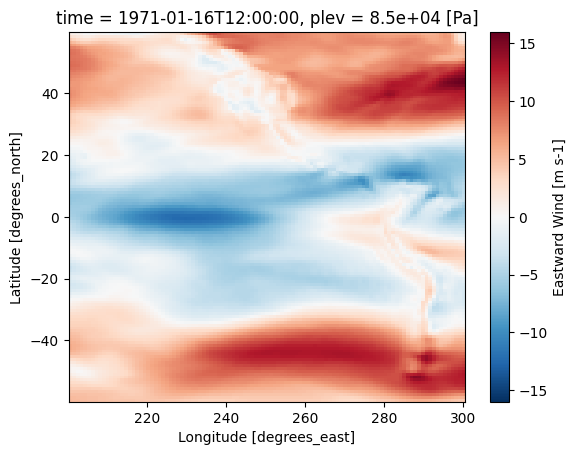

In [5]:
ua.sel(lat=slice(-60,60), lon=slice(200,300), plev=85000).isel(time=0).ua.plot()

In [6]:
boxes_chile_winds = {
    "chile_u_norte": [287.5, 289.5, -37, -33],
    "chile_u_sur": [286.5, 288.5, -42, -37],
    "A_arg": [286, 292, -52, -40]
}
chile_wind_cmip6 = ua.sel(lat=slice(boxes_chile_winds["chile_u_norte"][2], boxes_chile_winds["chile_u_norte"][3]),
                           lon=slice(boxes_chile_winds["chile_u_norte"][0], boxes_chile_winds["chile_u_norte"][1]), 
                           plev=85000).ua.mean(dim=["lat","lon"]
                           )
chile_wind_era5 = data_850.sel(latitude=slice(boxes_chile_winds["chile_u_norte"][2], boxes_chile_winds["chile_u_norte"][3]),
                           longitude=slice(boxes_chile_winds["chile_u_norte"][0], boxes_chile_winds["chile_u_norte"][1])
                           ).u.mean(dim=["latitude","longitude"])

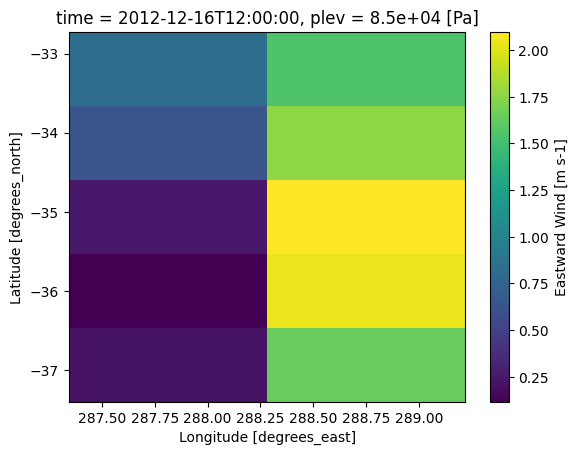

In [7]:
ua.sel(lat=slice(boxes_chile_winds["chile_u_norte"][2], boxes_chile_winds["chile_u_norte"][3]),
                           lon=slice(boxes_chile_winds["chile_u_norte"][0], boxes_chile_winds["chile_u_norte"][1]), 
                           plev=85000,time="2012-12").ua.plot()

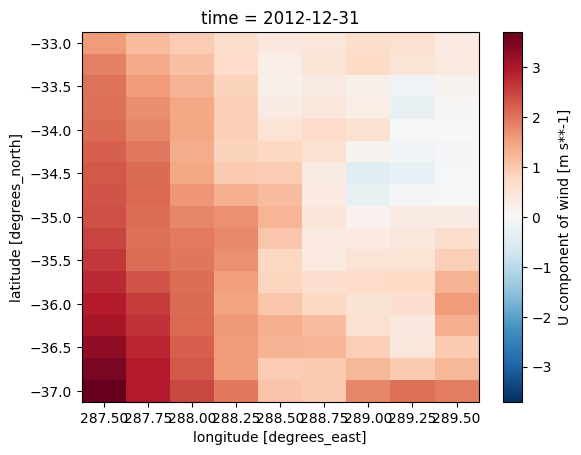

In [8]:
data_850.sel(latitude=slice(boxes_chile_winds["chile_u_norte"][2], boxes_chile_winds["chile_u_norte"][3]),
                           longitude=slice(boxes_chile_winds["chile_u_norte"][0], boxes_chile_winds["chile_u_norte"][1])
                           ,time="2012-12").u.plot()

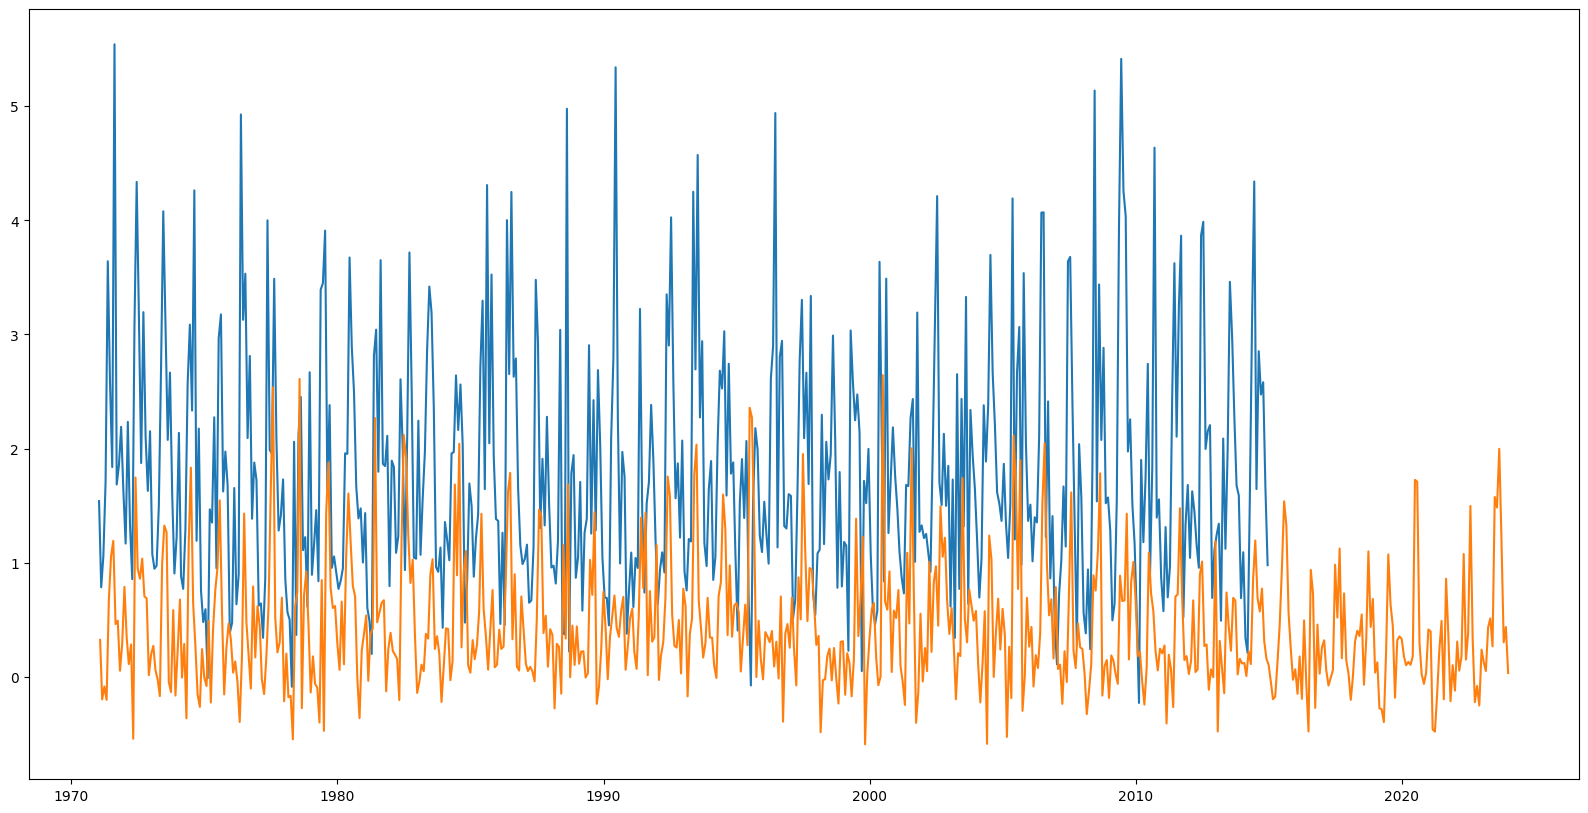

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(ua.time, chile_wind_cmip6)
ax.plot(data_850.time, chile_wind_era5)

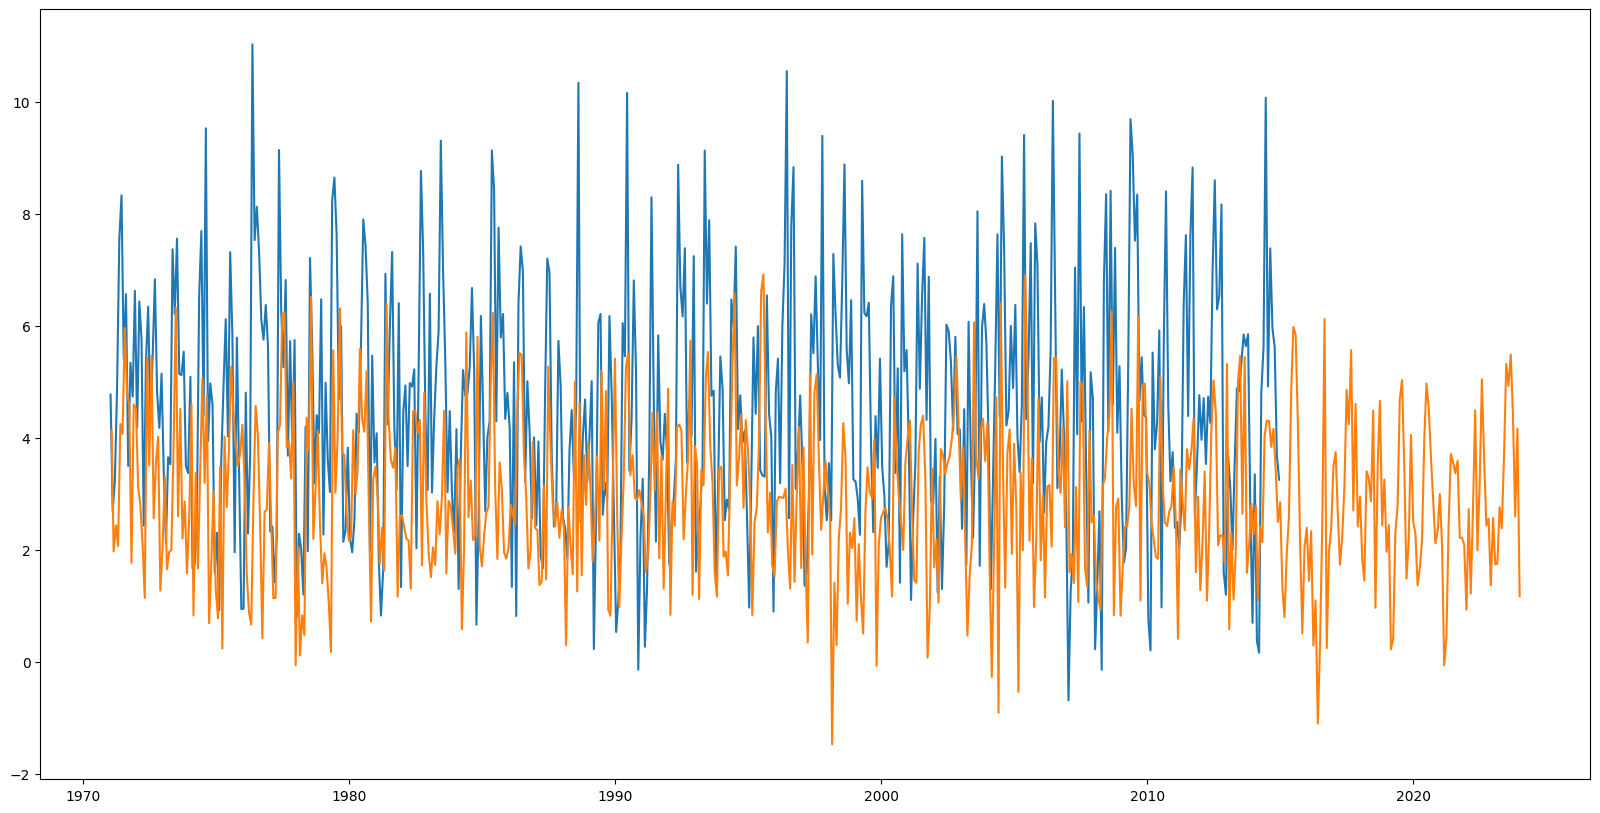

In [10]:
chile_wind_cmip6 = ua.sel(lat=slice(boxes_chile_winds["chile_u_sur"][2], boxes_chile_winds["chile_u_sur"][3]),
                           lon=slice(boxes_chile_winds["chile_u_sur"][0], boxes_chile_winds["chile_u_sur"][1]), 
                           plev=85000).ua.mean(dim=["lat","lon"]
                           )
chile_wind_era5 = data_850.sel(latitude=slice(boxes_chile_winds["chile_u_sur"][2], boxes_chile_winds["chile_u_sur"][3]),
                           longitude=slice(boxes_chile_winds["chile_u_sur"][0], boxes_chile_winds["chile_u_sur"][1])
                           ).u.mean(dim=["latitude","longitude"])
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(ua.time, chile_wind_cmip6)
ax.plot(data_850.time, chile_wind_era5)

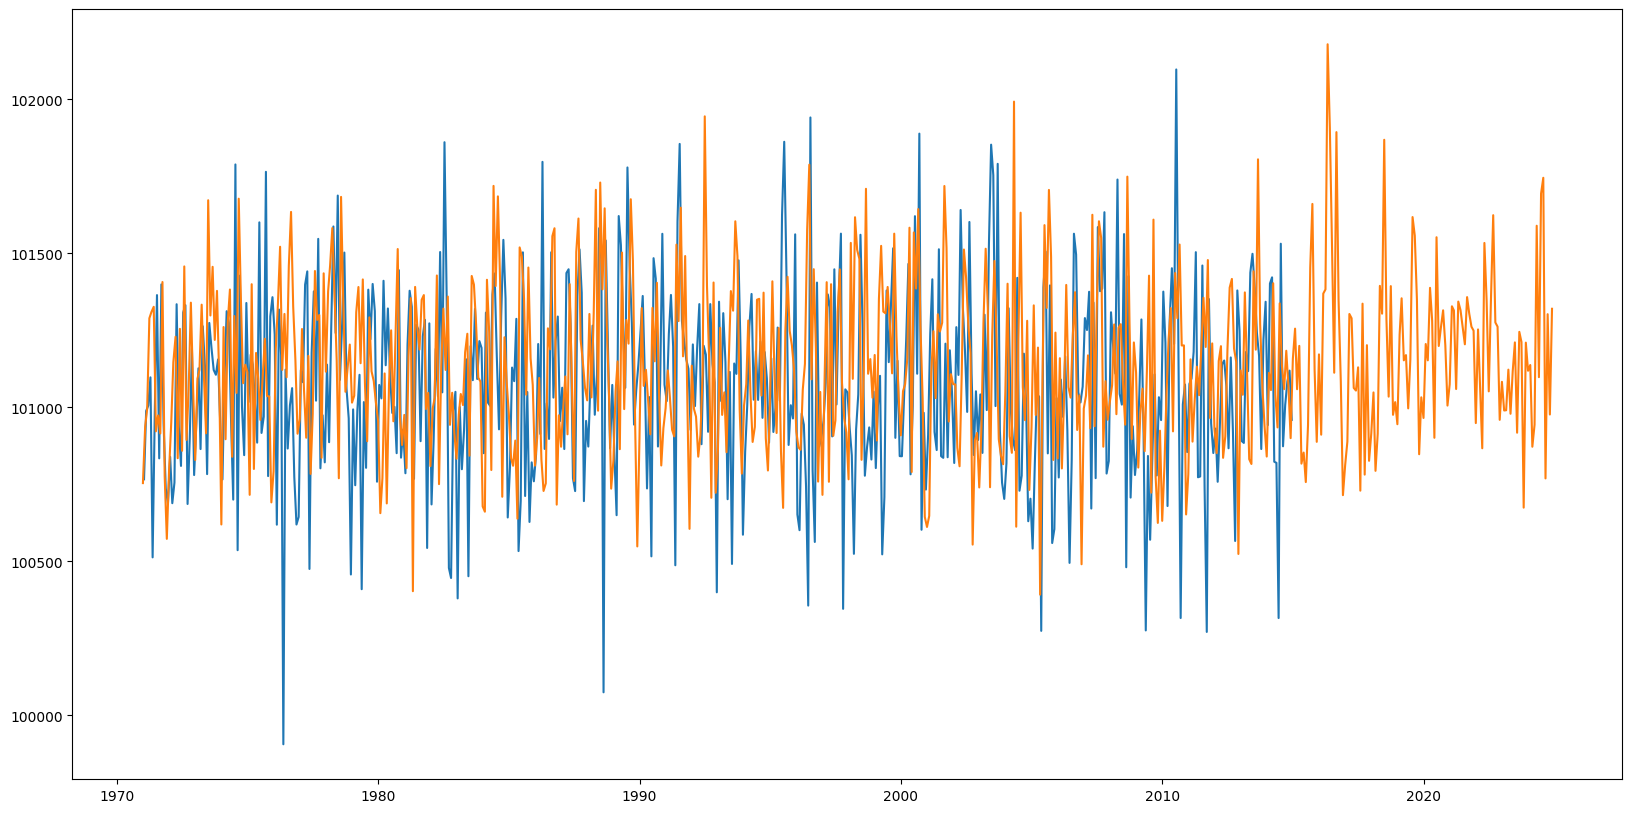

In [11]:
chile_msl_cmip6 = psl.sel(lat=slice(boxes_chile_winds["A_arg"][2], boxes_chile_winds["A_arg"][3]),
                           lon=slice(boxes_chile_winds["A_arg"][0], boxes_chile_winds["A_arg"][1])
                            ).psl.mean(dim=["lat","lon"]
                           )
chile_msl_era5 = data_msl.sel(latitude=slice(boxes_chile_winds["A_arg"][2], boxes_chile_winds["A_arg"][3]),
                           longitude=slice(boxes_chile_winds["A_arg"][0], boxes_chile_winds["A_arg"][1])
                           ).msl.mean(dim=["latitude","longitude"])
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(ua.time, chile_msl_cmip6)
ax.plot(data_msl.time, chile_msl_era5)

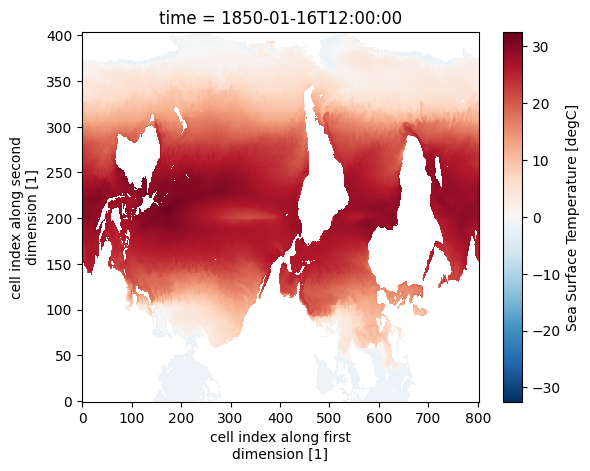

In [13]:
tos.isel(time=0).tos.plot()